<a href="https://colab.research.google.com/github/ImKshitij09/AI-ML-CLASS/blob/main/Project_Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [18]:
forecastor = pd.read_csv('energy_dataset.csv')

In [19]:
forecastor.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [20]:
forecastor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [21]:
forecastor.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [22]:
forecastor.replace(0.0, np.nan, inplace=True)
missing_values = forecastor.isnull().sum()
missing_percentage = (forecastor.isnull().sum() / len(forecastor)) * 100

# Combine both into a summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display the summary
print(missing_summary)

                                             Missing Values  Percentage
generation marine                                     35064  100.000000
generation fossil coal-derived gas                    35064  100.000000
forecast wind offshore eday ahead                     35064  100.000000
generation wind offshore                              35064  100.000000
generation fossil oil shale                           35064  100.000000
generation fossil peat                                35064  100.000000
generation geothermal                                 35064  100.000000
generation hydro pumped storage aggregated            35064  100.000000
generation hydro pumped storage consumption           12626   36.008442
generation fossil brown coal/lignite                  10535   30.045060
forecast solar day ahead                                539    1.537189
total load actual                                        36    0.102669
generation biomass                                       23    0

In [24]:
columns_to_drop = ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead','generation marine','generation fossil coal-derived gas','generation wind offshore','generation fossil oil shale','generation fossil peat','generation geothermal']
forecastor = forecastor.drop(columns=columns_to_drop)

In [25]:
# Replace missing values with the mean of each *numeric* column
for column in forecastor.select_dtypes(include=np.number).columns:
    forecastor[column] = forecastor[column].fillna(forecastor[column].mean())

# Verify that missing values in numeric columns have been filled
print(forecastor.select_dtypes(include=np.number).isnull().sum())

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64


In [26]:
# Convert 'time' column to datetime and remove timezone information
forecastor['time'] = pd.to_datetime(forecastor['time'], utc=True).dt.tz_localize(None)
print(forecastor['time'].head())


0   2014-12-31 23:00:00
1   2015-01-01 00:00:00
2   2015-01-01 01:00:00
3   2015-01-01 02:00:00
4   2015-01-01 03:00:00
Name: time, dtype: datetime64[ns]


Feature Engineering

In [27]:
# Grouping renewable and fossil columns into new features
renewable_sources = [
    'generation biomass', 'generation hydro run-of-river and poundage',
    'generation hydro water reservoir','generation solar',
    'generation wind onshore', 'generation other renewable','generation nuclear'
]

fossil_sources = [
    'generation fossil brown coal/lignite','generation fossil gas', 'generation fossil hard coal', 'generation fossil oil']

forecastor['renewable_generation'] = forecastor[renewable_sources].sum(axis=1)
forecastor['fossil_generation'] = forecastor[fossil_sources].sum(axis=1)

# Feature Engineering: Adding temporal and derived features
forecastor['time'] = pd.to_datetime(forecastor['time'], utc=True).dt.tz_localize(None)
forecastor['hour'] = forecastor['time'].dt.hour
forecastor['day_of_week'] = forecastor['time'].dt.dayofweek
forecastor['month'] = forecastor['time'].dt.month
forecastor['year'] = forecastor['time'].dt.year

forecastor['renewable_fossil_ratio'] = forecastor['renewable_generation'] / (
    forecastor['fossil_generation'] + 1e-6  # Avoid division by zero
)

forecastor['load_difference'] = forecastor['total load actual'] - forecastor['total load forecast']
forecastor['price_difference'] = forecastor['price actual'] - forecastor['price day ahead']
forecastor['price_ratio'] = forecastor['price actual'] / (forecastor['price day ahead'] + 1e-6)

# Display the updated dataframe with new features
forecastor.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,renewable_generation,fossil_generation,hour,day_of_week,month,year,renewable_fossil_ratio,load_difference,price_difference,price_ratio
0,2014-12-31 23:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,16993.0,10156.0,23,2,12,2014,1.673198,-733.0,15.31,1.305589
1,2015-01-01 00:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,16223.0,10437.0,0,3,1,2015,1.554374,-552.0,16.82,1.349688
2,2015-01-01 01:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,15475.0,9918.0,1,3,1,2015,1.560294,-781.0,17.15,1.362349
3,2015-01-01 02:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,14627.0,8859.0,2,3,1,2015,1.651089,-1356.0,17.05,1.403359
4,2015-01-01 03:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,14249.0,8313.0,3,3,1,2015,1.714062,-1521.0,17.63,1.458995


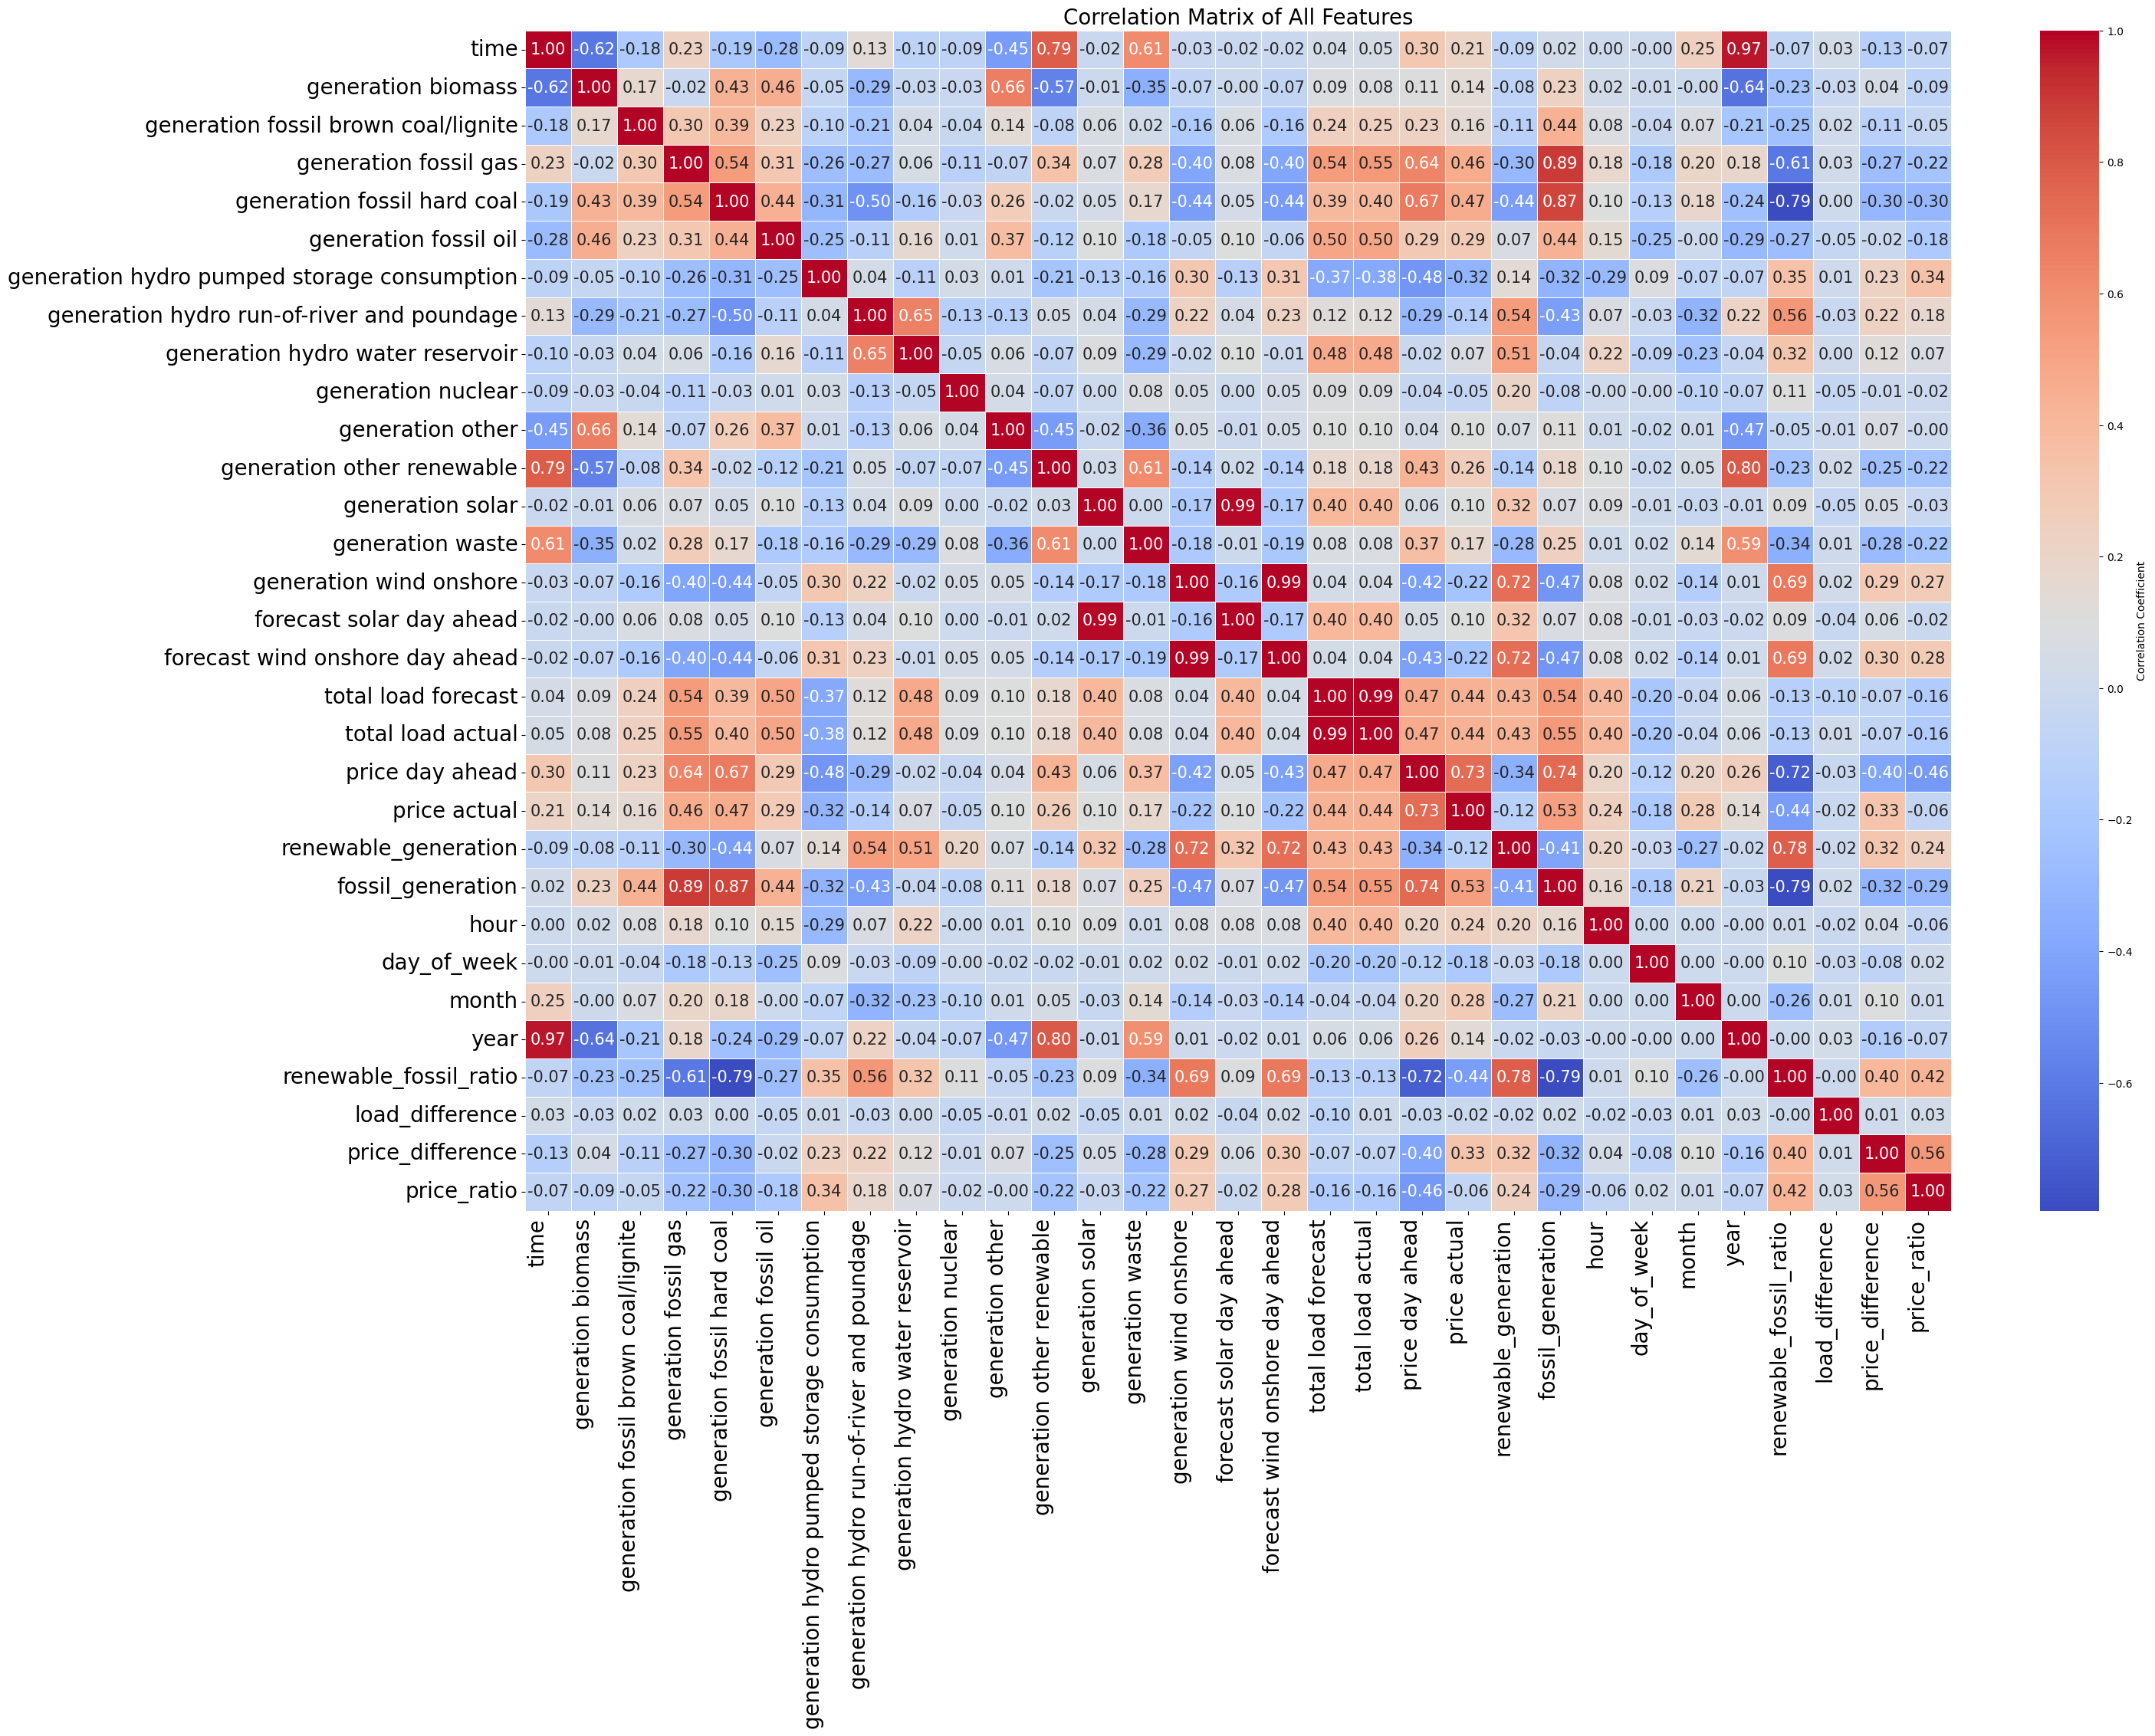

In [43]:

# Compute the correlation matrix for all features
correlation_matrix = forecastor.corr()

# Plot the heatmap
plt.figure(figsize=(30, 20))  # Set the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,           # Show correlation coefficients
    fmt=".2f",            # Format coefficients to 2 decimal places
    cmap='coolwarm',      # Use the 'coolwarm' color scheme
    linewidths=0.5,       # Add cell dividers
    cbar_kws={'label': 'Correlation Coefficient'},  # Label for the color bar
    annot_kws={"size": 15}  # Reduce annotation text size
)

# Add a title and adjust label orientation
plt.title('Correlation Matrix of All Features', fontsize=20)
plt.xticks(rotation=90, ha='right', fontsize=20)  # Rotate x-axis labels
plt.yticks(fontsize=20)                           # Keep y-axis labels horizontal
plt.show()


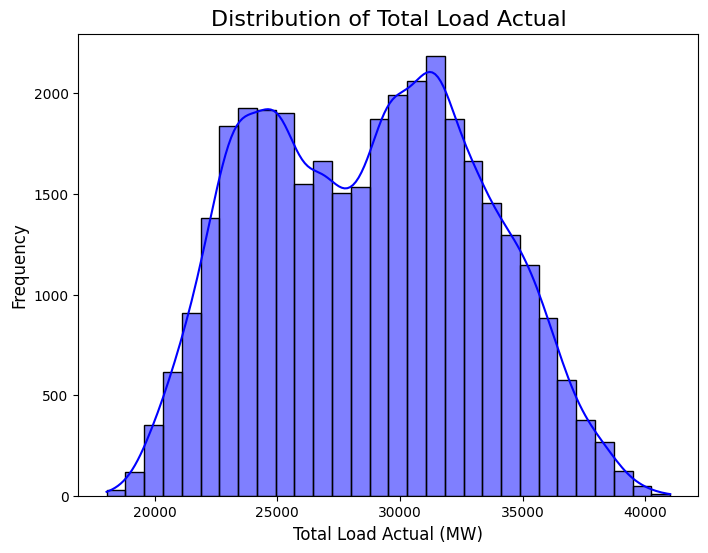

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(forecastor['total load actual'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Load Actual', fontsize=16)
plt.xlabel('Total Load Actual (MW)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [48]:

# Define features (X) and target (y)
features = ['total load forecast', 'renewable_generation', 'fossil_generation',
            'price actual', 'price day ahead', 'hour', 'day_of_week', 'month']
X = forecastor[features]
y = forecastor['total load actual']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 224837.64120483492
R² Score: 0.989212439963163


In [54]:

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")


Root Mean Squared Error (RMSE): 474.17047694350913
MAPE: 1.10%


<ipython-input-50-6d0715f02e9b>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


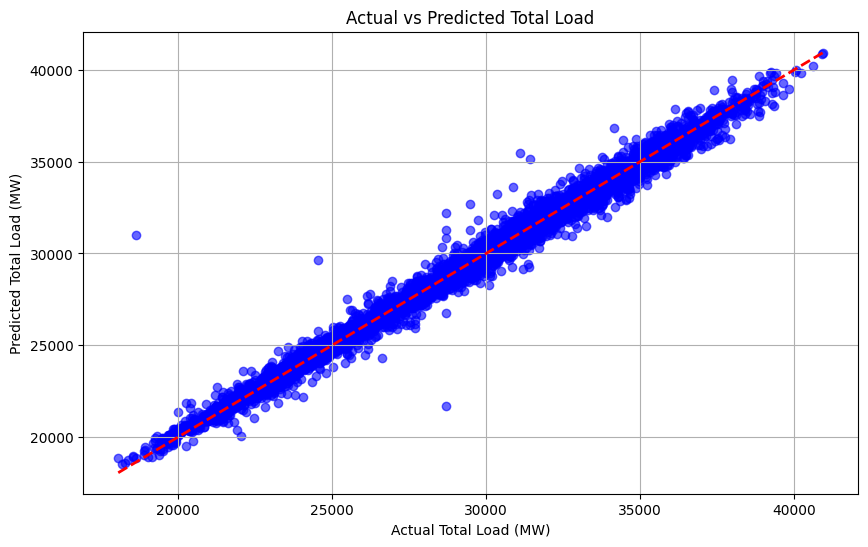

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs Predicted Total Load')
plt.xlabel('Actual Total Load (MW)')
plt.ylabel('Predicted Total Load (MW)')
plt.grid(True)
plt.show()


In [51]:
# Predict future loads using the test set
future_predictions = model.predict(X_test)

# Combine with the time column for visualization
forecast_results = X_test.copy()
forecast_results['Predicted Total Load'] = future_predictions
forecast_results['Actual Total Load'] = y_test
forecast_results['time'] = forecastor.loc[X_test.index, 'time']

# Display results
print(forecast_results.head())


       total load forecast  renewable_generation  fossil_generation  \
6070                 25374                9808.0       13884.000000   
32600                32568               14120.0       14409.000000   
8846                 31902               26177.0        5988.168087   
1483                 33860               21056.0       12922.168087   
4219                 30992               15426.0       15512.000000   

       price actual  price day ahead  hour  day_of_week  month  \
6070          65.66            52.62    21            3      9   
32600         81.89            76.30     7            3      9   
8846          49.84            33.45    13            0      1   
1483          83.80            67.32    18            1      3   
4219          73.15            59.61    18            3      6   

       Predicted Total Load  Actual Total Load                time  
6070           25408.603815            25744.0 2015-09-10 21:00:00  
32600          32398.365579           

<ipython-input-56-dba122107360>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(


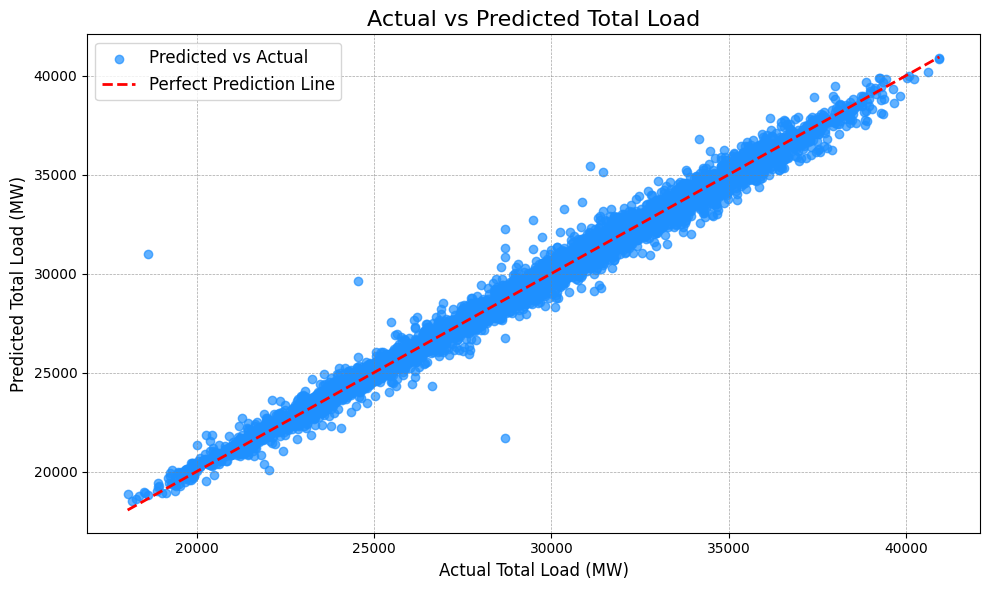

In [56]:
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue', label='Predicted vs Actual')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--', lw=2, color='red', label='Perfect Prediction Line'
)
plt.title('Actual vs Predicted Total Load', fontsize=16)
plt.xlabel('Actual Total Load (MW)', fontsize=12)
plt.ylabel('Predicted Total Load (MW)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Lighter gridlines
plt.legend(fontsize=12)  # Add legend
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


<ipython-input-57-b52b22811264>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(


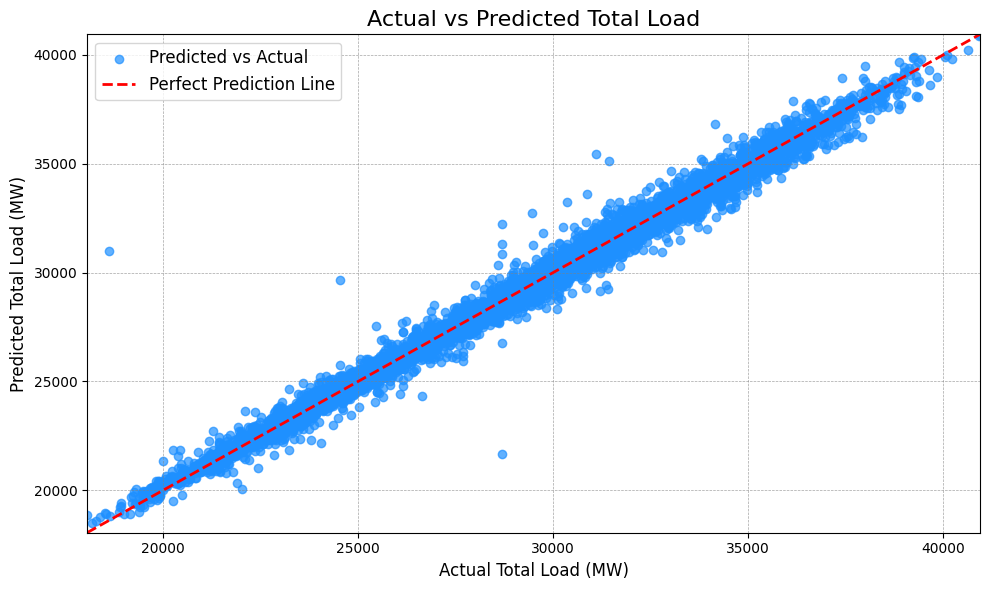

In [57]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue', label='Predicted vs Actual')

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--', lw=2, color='red', label='Perfect Prediction Line'
)

# Ensure the axes have the same range
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

# Labels and title
plt.title('Actual vs Predicted Total Load', fontsize=16)
plt.xlabel('Actual Total Load (MW)', fontsize=12)
plt.ylabel('Predicted Total Load (MW)', fontsize=12)

# Gridlines and legend
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [60]:

model_path = 'energy_forecasting_model.pkl'
joblib.dump(model, model_path)
print(f"Model saved at: {model_path}")


Model saved at: energy_forecasting_model.pkl
